In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

1. Гендерные различия в оттоке клиентов:

H₀ : Средний уровень оттока (Churn) не зависит от пола клиента.

H₁ : Средний уровень оттока различается между мужчинами и женщинами

1. Gender differences in customer churn:

H₀ : The mean churn rate (Churn) is independent of customer gender.

H₁ : The mean churn rate differs between males and females

In [36]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)

df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


1. gender – Пол клиента
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

In [37]:
contingency_table = pd.crosstab(df['gender'], df['Churn'])
contingency_table

Churn,0,1
gender,,
0,1440,519
1,1499,542


In [38]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nХи-квадрат тест:\nχ² = {chi2:.4f}, p-value = {p:.4f}")


Хи-квадрат тест:
χ² = 0.0001, p-value = 0.9929


p-value (0.9929) > 0.05, что означает, что нет оснований отвергать гипотезу. Следовательно уровень оттока между женщинами и мужчинами статистически незначимы.

The p-value (0.9929) > 0.05 which means that there is no reason to reject the hypothesis. Consequently, the level of outflow between women and men is statistically insignificant.

2. Проверка гипотезы: влияние проживания рядом с клубом на отток

H₀: Клиенты, живущие рядом (Near_Location = 1), не отличаются по уровню оттока от тех, кто живет далеко.

H₁: Клиенты, живущие рядом, реже уходят.
Тест: χ²-тест для сравнения категориальных переменных.

2. Hypothesis testing: the effect of living close to the club on churn rate

H₀: Customers who live near (Near_Location = 1) do not differ in churn rate from those who live far away.

H₁: Customers who live close to the club are less likely to leave.
Test: χ² test for comparison of categorical variables.

In [39]:
contingency_table2 = pd.crosstab(df['Near_Location'], df['Churn'])
contingency_table2

Churn,0,1
Near_Location,,
0,373,246
1,2566,815


In [40]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table2)
print(f"\nХи-квадрат тест:\nχ² = {chi2:.4f}, p-value = {p:.4f}")


Хи-квадрат тест:
χ² = 64.8365, p-value = 0.0000


p-value (0.0000) < 0.05, это означает что Н0 отвергается гипотезу.
Следовательно проживание возле клуба влияет на отток клиентов.

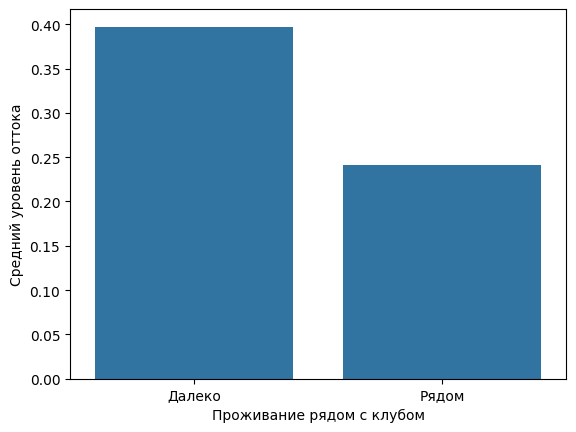

In [41]:
churn_rates = df.groupby("Near_Location")["Churn"].mean()
sns.barplot(x=churn_rates.index, y=churn_rates.values)
plt.xticks([0, 1], ['Далеко', 'Рядом'])
plt.ylabel('Средний уровень оттока')
plt.xlabel('Проживание рядом с клубом')
plt.show()


In [42]:
churn_near = df[df['Near_Location'] == 1]['Churn'].mean()
churn_far = df[df['Near_Location'] == 0]['Churn'].mean()

print(f"Средний отток (рядом): {churn_near:.2%}")
print(f"Средний отток (далеко): {churn_far:.2%}")
print(f"Разница: {(churn_far - churn_near):.2%}")


Средний отток (рядом): 24.11%
Средний отток (далеко): 39.74%
Разница: 15.64%


Разница оттока клиентов проживающих далеко и близко составляет 15.64%. Сдедовательно принимаем можно сделать вывод о том, что расстояние которое необходимо приодолевать клиенту влияет на уровень оттока.

3. Влияние групповых занятий на удержание клиентов

H₀: Средний уровень оттока не зависит от посещения групповых занятий (Group_visits).

H₁: Посещение групповых занятий снижает отток.

3. Impact of group classes on customer retention

H₀: The average churn rate is independent of group attendance (Group_visits).

H₁: Attending group sessions reduces churn.

In [43]:
contingency_table3 = pd.crosstab(df['Group_visits'], df['Churn'])
contingency_table3

Churn,0,1
Group_visits,,
0,1575,776
1,1364,285


In [44]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table2)
print(f"\nХи-квадрат тест:\nχ² = {chi2:.4f}, p-value = {p:.4f}")


Хи-квадрат тест:
χ² = 64.8365, p-value = 0.0000


p-value (0.0000) < 0.05, это означает что Н0 отвергается гипотезу.
Следовательно посещение групповых занятий влияет на отток клиентов.

In [45]:
churn_near = df[df['Group_visits'] == 1]['Churn'].mean()
churn_far = df[df['Group_visits'] == 0]['Churn'].mean()

print(f"Средний отток (посещает): {churn_near:.2%}")
print(f"Средний отток (не посещает): {churn_far:.2%}")
print(f"Разница: {(churn_far - churn_near):.2%}")

Средний отток (посещает): 17.28%
Средний отток (не посещает): 33.01%
Разница: 15.72%


Разница оттока клиентов которые посещают занятия и не посещают 15.72%. Сдедовательно принимаем Н1 и  можно сделать вывод о том, что посещение занятий положительно влияет на отток клиентов. Неоходимо акции направленные на посещения занятий.

The difference between the churn rate of clients who attend classes and those who do not is 15.72%. Consequently, we accept H1 and we can conclude that attendance has a positive impact on customer churn. It is necessary to promote actions aimed at attending classes

4. Разница в средней частоте посещений между ушедшими и оставшимися клиентами

H₀: Средняя частота посещений (Avg_class_frequency_total) одинакова для тех, кто ушел, и тех, кто остался.

H₁: Средняя частота посещений различается.
Тест: t-тест для сравнения средних значений.

4. Difference in average frequency of visits between departing and remaining customers

H₀: The average visit frequency (Avg_class_frequency_total) is the same for those who left and those who stayed.

H₁: The average frequency of visits is different.
Test: t-test to compare mean values.

In [46]:
# Разделяем данные на две группы: ушедшие и оставшиеся
churn_yes = df[df['Churn'] == 1]['Avg_class_frequency_total']
churn_no = df[df['Churn'] == 0]['Avg_class_frequency_total']

Далее проверяем на нормальность и если тест шапико-вилка показывает что распределение не является номральным используем тест Манна-Уитни

In [47]:
print("Shapiro-Wilk test for Churn = 0:", shapiro(churn_no))
print("Shapiro-Wilk test for Churn = 1:", shapiro(churn_yes))


Shapiro-Wilk test for Churn = 0: ShapiroResult(statistic=np.float64(0.9927942750923975), pvalue=np.float64(6.263109385904586e-11))
Shapiro-Wilk test for Churn = 1: ShapiroResult(statistic=np.float64(0.9933180616418081), pvalue=np.float64(0.00010580901520087885))


In [48]:
stat, p = mannwhitneyu(churn_yes, churn_no, alternative='two-sided')
print(f"Манна-Уитни U-тест: U = {stat}, p-value = {p:.4f}")


Манна-Уитни U-тест: U = 1043052.0, p-value = 0.0000


Тест Манна-Уитни показал, что: 
p-value (0.0000) < 0.05, это означает что Н0 отвергается.
Следовательно частота посещенией влияет на отток клиентов.